In [82]:
import tnl 
import nltk
text = "kitapçı kalemi verdi"
# this operation will seperate the sentence given into it's pieces
parsed = tnl.parse_sentence(text)

['kitap' - N, 'çı' - N2NF, 'kalem' - N, 'i' - PS, 'ver' - V, 'di' - PP]


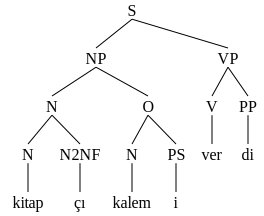

In [83]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> N O
VP -> V PP
O -> N PS
N -> 'kitap' | 'kalem' | N N2NF 
V -> 'ver' 
PP -> 'di'
N2NF -> 'çı'
PS -> 'i'
""")

sent =  parsed
parser = nltk.ChartParser(grammar)
trees = list(parser.parse(sent))
trees[0]

In [84]:
text = "ben yumurtayı yedim"

parsed = tnl.parse_sentence(text)

['ben' - N, 'yumurta' - N, 'yı' - AC, 'ye' - V, 'di' - PP, 'm' - PER]


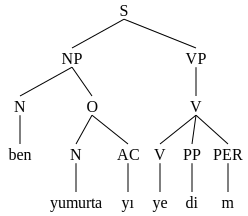

In [85]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> N O
VP -> V
O -> N AC
N -> 'ben' | 'yumurta' 
V -> 'ye' | V PP PER
PER -> 'm'
PP -> 'di'
AC -> 'yı'
""")

sent =  parsed
parser = nltk.ChartParser(grammar)
trees = list(parser.parse(sent))
trees[0]

['bu' - N, 'ev' - N, 'güzel' - N, 'miş' - LT]


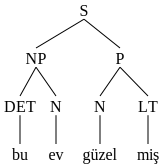

In [86]:
text = "bu ev güzelmiş"
parsed = tnl.parse_sentence(text)

grammar = nltk.CFG.fromstring("""
S -> NP P
NP -> DET N
P -> N LT
DET -> 'bu'
N -> 'ev' | 'güzel'
LT -> 'miş'
""")

parser = nltk.ChartParser(grammar)
trees = list(parser.parse(parsed))
trees[0]

['bu' - N, 'köpek' - N, 'koş' - V, 'uyor' - PR]


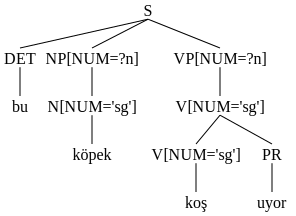

In [87]:
import svgling
text = "bu köpek koşuyor"
parsed = tnl.parse_sentence(text)

grammar = nltk.grammar.FeatureGrammar.fromstring("""
S -> DET NP[NUM=?n] VP[NUM=?n]
NP[NUM=?n] -> N[NUM=?n]
VP[NUM=?n] -> V[NUM=?n]
V[NUM='pl'] -> V[NUM='sg'] PER
V[NUM='sg'] -> 'koş' | V[NUM='sg'] PR
N[NUM='pl'] -> N[NUM=sg] PL
N[NUM='sg'] -> 'köpek'
DET -> 'bu'
PER -> 'lar'
PL -> 'ler'
PR -> 'uyor'
""")
parser = nltk.ChartParser(grammar)

# SINGULAR
trees = list(parser.parse(parsed))
tree_str = str(trees[0].pformat()).replace("[]","") 
nltk.tree.Tree.fromstring(tree_str)

['bu' - N, 'köpek' - N, 'ler' - PL, 'koş' - V, 'uyor' - PR, 'lar' - PER]


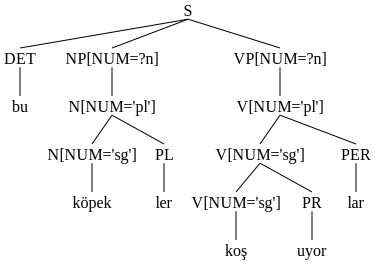

In [88]:
text2 = "bu köpekler koşuyorlar"
parsed2 = tnl.parse_sentence(text2)

# PLURAL
trees = list(parser.parse(parsed2))
tree_str = str(trees[0].pformat()).replace("[]","") 
nltk.tree.Tree.fromstring(tree_str)